In [1]:
import statistics
import numpy as np
from PIL import Image
import cv2
import pandas as pd
labeled_dir = str("/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled")
# Dicecの計算
def cal_DiceMulitple(dir, input_name):
    # change the label count as your preference
    Dice = [0] * 11
    Count1 = [0] * 11 #予測結果の各ラベルの要素数
    Count2 = [0] * 11 #ラベル画像の
    Count3 = [0] * 11 #正解した画素数
    
    for index in range(len(input_name)):
        print('index = ', index)

        img1 = cv2.imread(dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(labeled_dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        #_, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY)
        print("予測画像:", dir  + '/' + input_name[index] + ".png")
        print("テストラベル:", labeled_dir + '/' + input_name[index] + ".png")
        unique_label1 = np.unique(img1)
        unique_label2 = np.unique(img2)
        # print(unique_label1)
        # print(unique_label2)
        # change the image array size to your need
        for n in range(256):
            for l in range(256):
                value1 = img1[n,l]
                # for index, uq_value in enumerate(unique_label1):
                #     if(value1 == uq_value):
                #         value1 = index

                Count1[value1] += 1

                value2 = img2[n,l]
                Count2[value2] += 1                    

                if(value1 == value2):
                    Count3[value1] += 1 
    for i in range(11):
        if(Count1[i]+Count2[i] != 0):
            Dice[i] = (2*Count3[i])/(Count1[i] + Count2[i])
        if(Count1[i]+Count2[i] == 0):
            print("")
            #print("4 label case:" + str(input_name[index]))
    Dice.append(statistics.mean(Dice[1:]))
    print('Count1 = ', Count1)
    print('Count2 = ', Count2)
    print('Count3 = ', Count3)
    print('Dice = ', Dice)
    #print(unique_label)

    return Dice


In [2]:
import os
# ファイル名の先頭部分（prefix）により自動的にファイル名を抽出するアルゴリズム。

""" 

Extracts filenames in directory if they start with the prefix input 


Args/Parameters:

    directory_path (string): The path of the dir (ex: /root/home/Documents/etc)
    
    prefix (string): Prefix of the file name (ex: 'Bo' is a prefix of 'Bone')

Returns:

    sorted_file_names (list of str): File names sorted in ascending order in the dir without extension ex: ['bone1', 'bone2', ...]

Raises:

    SomeError: ...

"""

def file_names_with_prefix(directory_path, prefix):

    # Initialize an empty list to store the file names without extensions
    file_names_without_extension = []

    # Loop through all files in the specified directory
    for filename in os.listdir(directory_path):
        #Checking if the file in loop exists in the directory_path not sure how is this necessary
        #??
        if os.path.isfile(os.path.join(directory_path, filename)):
            # Check if the file name starts with the specified prefix
            if filename.startswith(prefix):
                # Get the file name without extension
                name_without_extension, _ = os.path.splitext(filename)

                # Append the file name (without extension) to the list
                file_names_without_extension.append(name_without_extension)

    # Sort the list of file names without extensions in ascending order
    sorted_file_names = sorted(
        file_names_without_extension,
        key=lambda x: (x.split('-')[0], int(x.split('-')[1]))
    )  # Modify this part based on your file naming convention

    # Now you have a sorted list of file names with the specified prefix and without extensions
    return sorted_file_names


In [3]:

#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/1-20250206-Unet-CRF-HP/fold1/crf")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/2-20250205-MCunet-CRF-HP/fold1/crf")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/3-20250208-TransUnet-CRF-HP/fold1/crf")

#unet
searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/MCU-108-21Dil (MRCNN)")
#mcunet

#searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU10821-CustomLoss")
searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss")
print(searchdir)


/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108


[ WARN:0@0.446] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N1-1.png'): can't open/read file: check file path/integrity
[ WARN:0@0.446] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N1-1.png'): can't open/read file: check file path/integrity
[ WARN:0@0.446] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N1-1.png'): can't open/read file: check file path/integrity
[ WARN:0@0.448] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N1-2.png'): can't open/read file: check file path/integrity
[ WARN:0@0.448] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N1-2.png'): can't open/read file: check file path/

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N1-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-1.png
image: N1-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N1-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-2.png
image: N1-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N1-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-3.png
image: N1-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N1-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-4.png
image: N1-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N1-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-5.png
Count1 =  [58491, 1180, 708

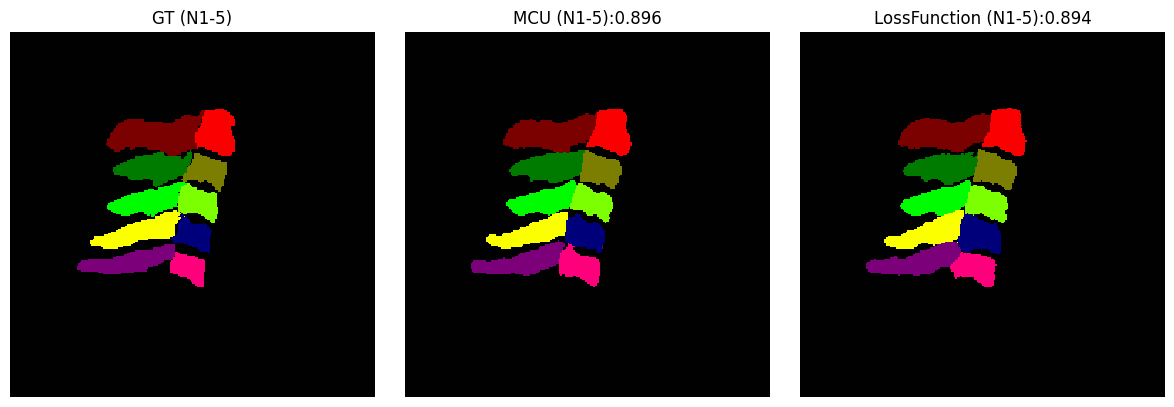

[ WARN:0@0.701] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N1-6.png'): can't open/read file: check file path/integrity
[ WARN:0@0.701] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N1-6.png'): can't open/read file: check file path/integrity
[ WARN:0@0.701] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N1-6.png'): can't open/read file: check file path/integrity
[ WARN:0@0.703] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N1-7.png'): can't open/read file: check file path/integrity
[ WARN:0@0.703] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N1-7.png'): can't open/read file: check file path/

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N1-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-6.png
image: N1-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N1-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-7.png
image: N1-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N1-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-8.png
image: N1-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N1-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-9.png
image: N1-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N1-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-10.png
Count1 =  [58491, 959, 81

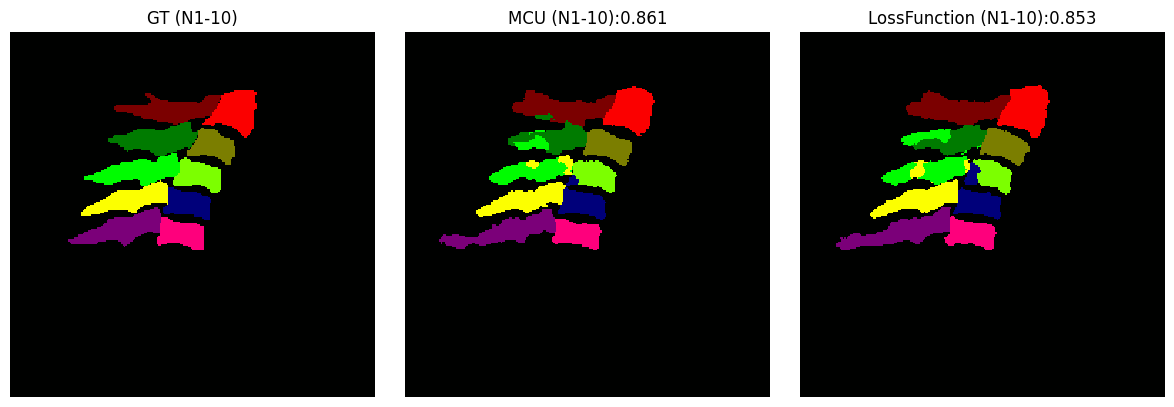

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-1.png
image: N2-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-2.png
image: N2-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-3.png
image: N2-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-4.png
Count1 =  [57907, 1299, 902, 551, 593, 641, 561, 707, 560, 1238, 577]
Count2 =  [57949, 1152, 823, 809, 670, 672, 640, 679, 561, 953, 628]
Count3 =  [57053, 1122, 770, 493, 586, 318, 548, 233, 521, 453, 547]
Dice =  [0.9848950

[ WARN:0@0.936] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-1.png'): can't open/read file: check file path/integrity
[ WARN:0@0.936] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N2-1.png'): can't open/read file: check file path/integrity
[ WARN:0@0.936] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-1.png'): can't open/read file: check file path/integrity
[ WARN:0@0.938] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-2.png'): can't open/read file: check file path/integrity
[ WARN:0@0.938] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N2-2.png'): can't open/read file: check file path/

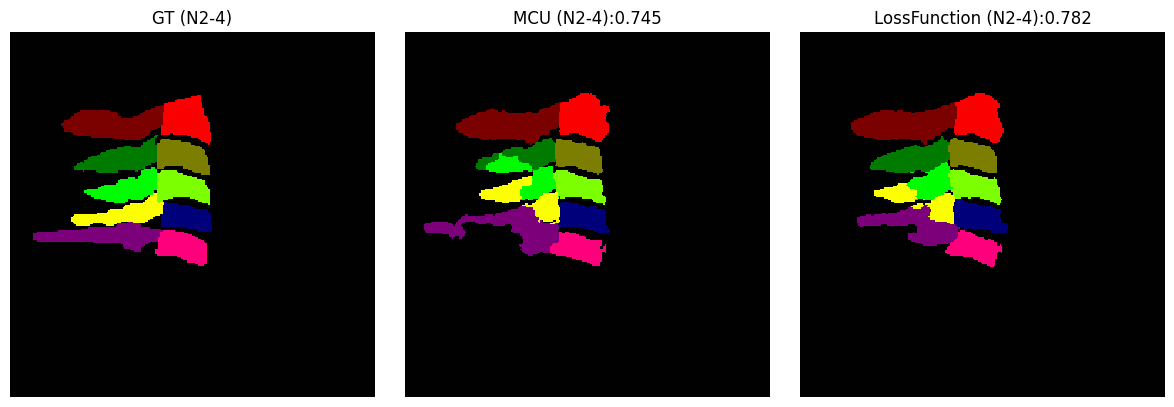

[ WARN:0@1.136] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-5.png'): can't open/read file: check file path/integrity
[ WARN:0@1.136] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N2-5.png'): can't open/read file: check file path/integrity
[ WARN:0@1.136] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-5.png'): can't open/read file: check file path/integrity


index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-5.png
image: N2-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-6.png
Count1 =  [57797, 1251, 867, 777, 588, 701, 585, 768, 591, 1047, 564]
Count2 =  [57830, 1304, 882, 833, 510, 705, 582, 732, 618, 964, 576]
Count3 =  [57408, 1213, 836, 746, 497, 658, 547, 707, 571, 929, 538]
Dice =  [0.9929860672680256, 0.9495107632093933, 0.9559748427672956, 0.9267080745341615, 0.9052823315118397, 0.9359886201991465, 0.9374464438731791, 0.9426666666666667, 0.9445822994210091, 0.9239184485330681, 0.9438596491228071, 0.9365938139838567]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N2-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/im

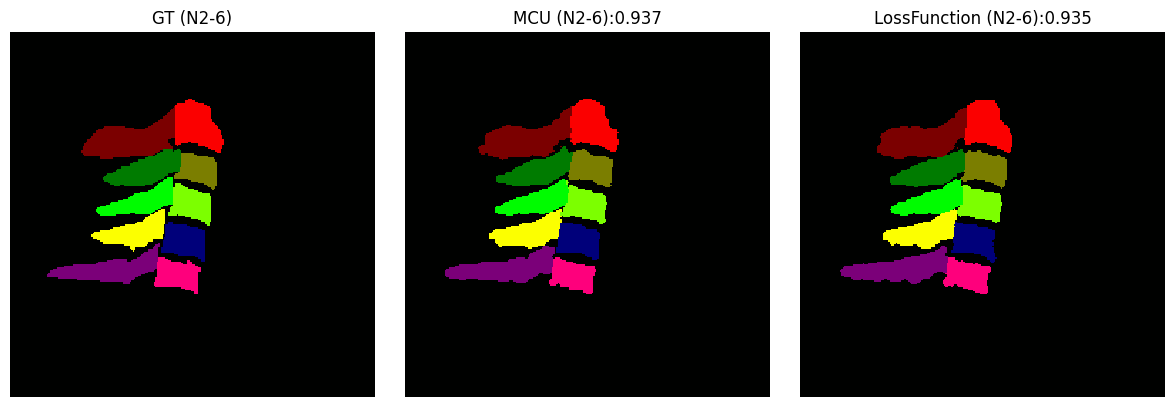

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-7.png
image: N2-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-8.png
image: N2-8 not found


[ WARN:0@1.341] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-7.png'): can't open/read file: check file path/integrity
[ WARN:0@1.341] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N2-7.png'): can't open/read file: check file path/integrity
[ WARN:0@1.341] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-7.png'): can't open/read file: check file path/integrity
[ WARN:0@1.343] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-8.png'): can't open/read file: check file path/integrity
[ WARN:0@1.343] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N2-8.png'): can't open/read file: check file path/

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-9.png
Count1 =  [60097, 931, 663, 602, 474, 502, 473, 245, 436, 671, 442]
Count2 =  [59499, 957, 624, 596, 480, 565, 501, 592, 458, 826, 438]
Count3 =  [59136, 894, 599, 572, 455, 470, 461, 159, 418, 175, 395]
Dice =  [0.9889293956319609, 0.9470338983050848, 0.9308469308469308, 0.9549248747913188, 0.9538784067085954, 0.8809746954076851, 0.946611909650924, 0.37992831541218636, 0.9351230425055929, 0.23380093520374082, 0.8977272727272727, 0.8060850281559332]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N2-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-9.png
Count1 =  [60404, 975, 656, 618, 470, 312, 470, 400, 368, 671, 192]
Count2 =  [59499, 957, 624, 596, 480, 565, 501, 592, 458, 826, 438]
Count3 =  [59016, 921, 602, 571, 453, 298

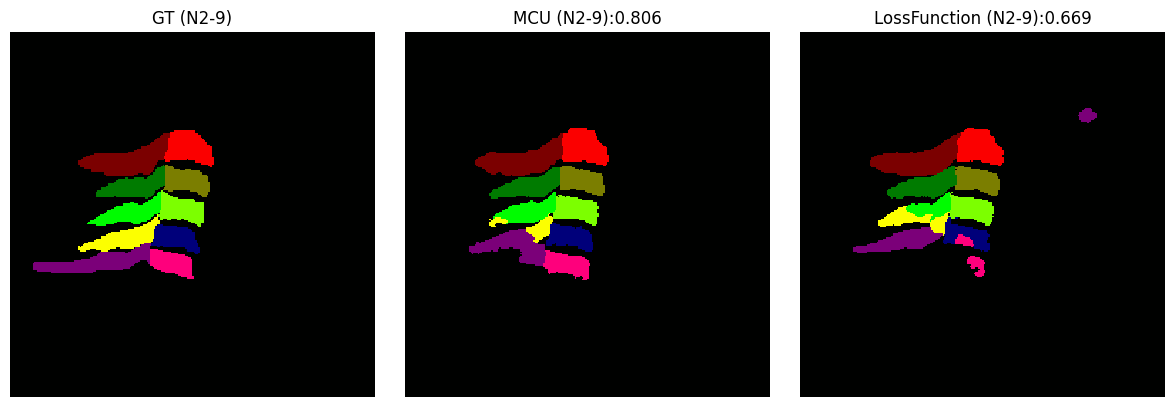

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-10.png
image: N2-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-1.png
image: N3-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-2.png


[ WARN:0@1.546] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-10.png'): can't open/read file: check file path/integrity
[ WARN:0@1.546] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N2-10.png'): can't open/read file: check file path/integrity
[ WARN:0@1.546] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N2-10.png'): can't open/read file: check file path/integrity
[ WARN:0@1.548] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-1.png'): can't open/read file: check file path/integrity
[ WARN:0@1.548] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N3-1.png'): can't open/read file: check file pa

image: N3-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-3.png
image: N3-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-4.png
Count1 =  [59610, 885, 592, 713, 425, 570, 365, 685, 367, 950, 374]
Count2 =  [60009, 903, 581, 574, 435, 528, 385, 553, 366, 834, 368]
Count3 =  [59276, 832, 536, 550, 409, 487, 345, 519, 301, 822, 334]
Dice =  [0.9910800123726163, 0.930648769574944, 0.9138959931798807, 0.8547008547008547, 0.9511627906976744, 0.8870673952641166, 0.92, 0.8384491114701131, 0.8212824010914052, 0.92152466367713, 0.9002695417789758, 0.8939001521435095]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N3-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/i

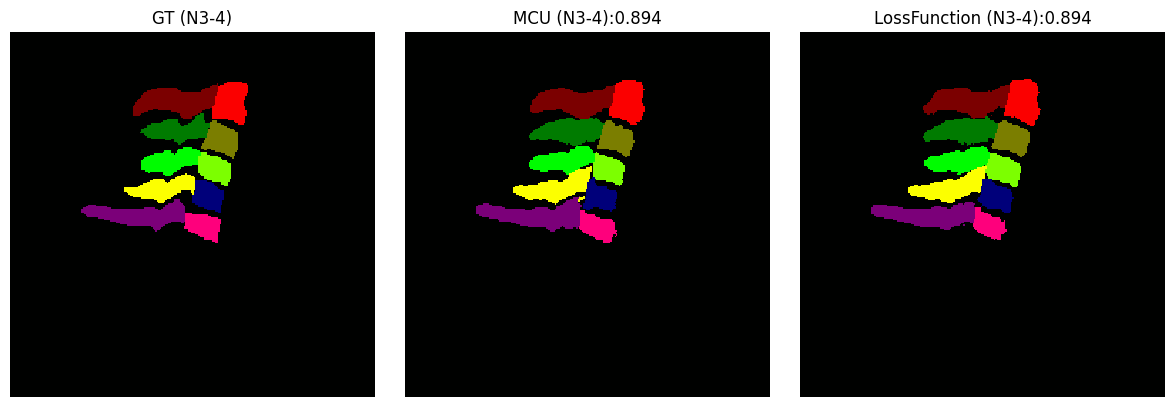

[ WARN:0@1.760] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-5.png'): can't open/read file: check file path/integrity
[ WARN:0@1.761] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N3-5.png'): can't open/read file: check file path/integrity
[ WARN:0@1.761] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-5.png'): can't open/read file: check file path/integrity
[ WARN:0@1.762] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-6.png'): can't open/read file: check file path/integrity
[ WARN:0@1.762] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N3-6.png'): can't open/read file: check file path/

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-5.png
image: N3-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-6.png
image: N3-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-7.png
image: N3-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-8.png
Count1 =  [59480, 976, 528, 709, 468, 586, 421, 692, 450, 805, 421]
Count2 =  [59661, 836, 507, 708, 428, 601, 476, 613, 458, 838, 410]
Count3 =  [59096, 809, 493, 659, 416, 540, 407, 585, 419, 746, 381]
Dice =  [0.99203464802

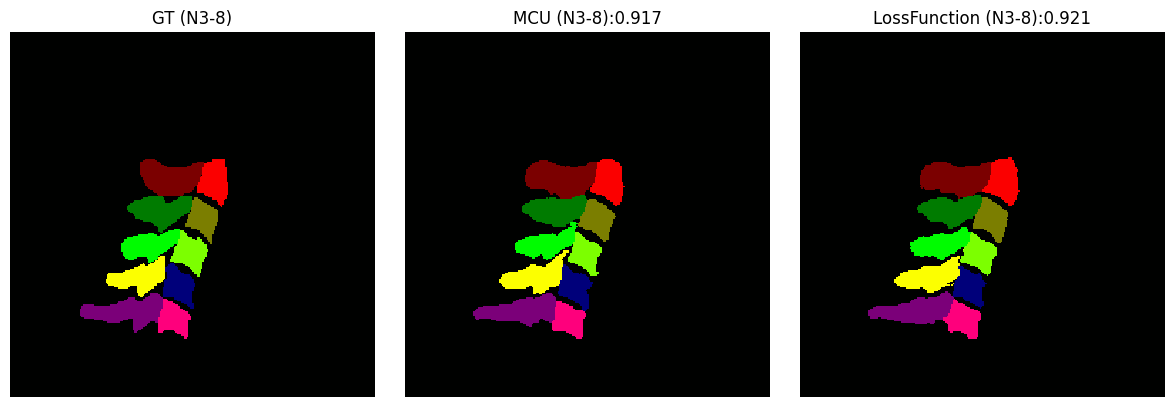

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-9.png
image: N3-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-10.png
image: N3-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N4-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-1.png
image: N4-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N4-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-2.png
image: N4-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N4-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-3.png
Count1 =  [56594, 1517, 

[ WARN:0@1.971] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-9.png'): can't open/read file: check file path/integrity
[ WARN:0@1.971] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N3-9.png'): can't open/read file: check file path/integrity
[ WARN:0@1.971] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-9.png'): can't open/read file: check file path/integrity
[ WARN:0@1.972] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N3-10.png'): can't open/read file: check file path/integrity
[ WARN:0@1.972] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N3-10.png'): can't open/read file: check file pat

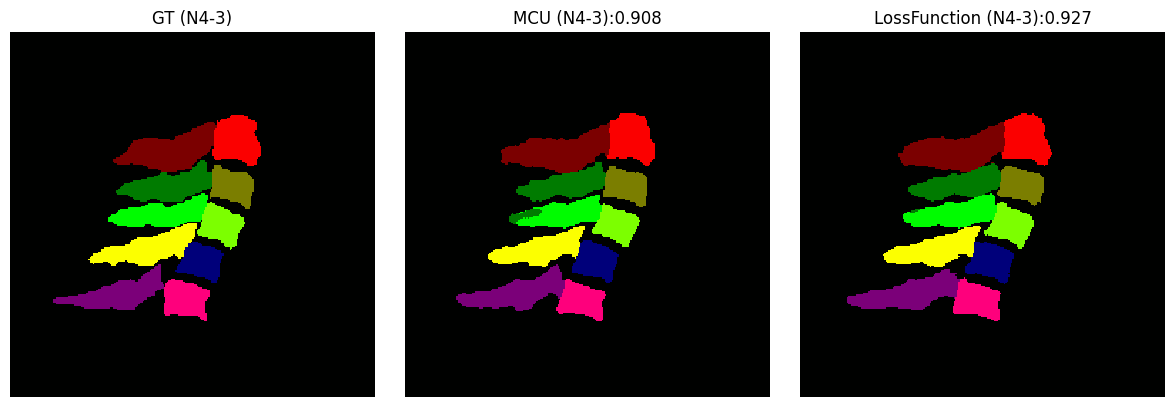

[ WARN:0@2.179] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N4-4.png'): can't open/read file: check file path/integrity
[ WARN:0@2.179] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N4-4.png'): can't open/read file: check file path/integrity
[ WARN:0@2.179] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N4-4.png'): can't open/read file: check file path/integrity
[ WARN:0@2.180] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N4-5.png'): can't open/read file: check file path/integrity
[ WARN:0@2.180] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N4-5.png'): can't open/read file: check file path/

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N4-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-4.png
image: N4-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N4-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-5.png
image: N4-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N4-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-6.png
image: N4-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N4-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-7.png
image: N4-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N4-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-8.png
Count1 =  [58614, 1079, 775

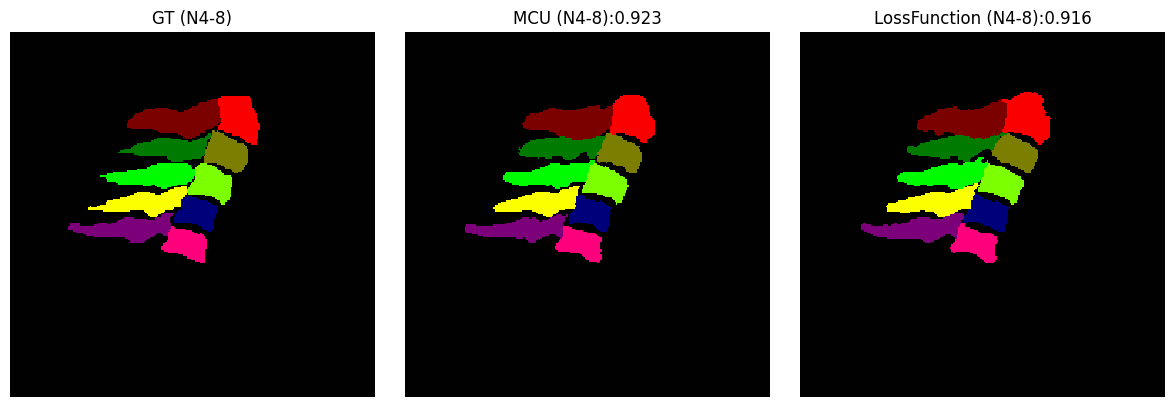

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N4-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-9.png
Count1 =  [58444, 946, 669, 842, 465, 709, 428, 832, 604, 1030, 567]
Count2 =  [58646, 765, 717, 805, 525, 749, 527, 793, 509, 929, 571]
Count3 =  [58069, 756, 647, 708, 452, 619, 391, 743, 485, 897, 532]
Dice =  [0.9918695020924075, 0.8836937463471654, 0.9336219336219336, 0.8597449908925319, 0.9131313131313131, 0.8491083676268861, 0.818848167539267, 0.9144615384615384, 0.87151841868823, 0.9157733537519143, 0.9349736379613357, 0.8894875468022115]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N4-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-9.png
Count1 =  [58363, 962, 686, 963, 537, 572, 490, 841, 547, 1025, 550]
Count2 =  [58646, 765, 717, 805, 525, 749, 527, 793, 509, 929, 571]
Count3 =  [58019, 759, 652, 722, 506, 528, 

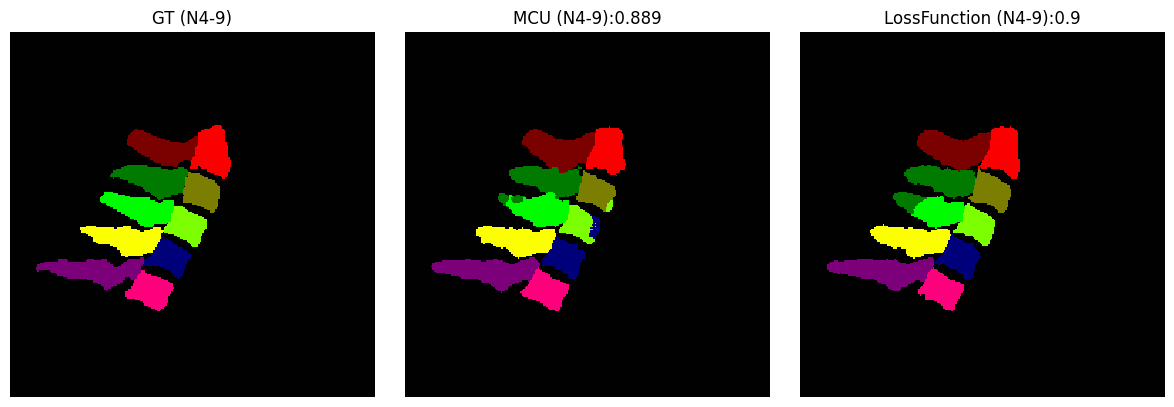

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N4-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-10.png
image: N4-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N5-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-1.png
image: N5-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N5-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-2.png
image: N5-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N5-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-3.png
image: N5-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N5-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-4.png
image: N5-4 not found
in

[ WARN:0@2.698] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-10.png'): can't open/read file: check file path/integrity
[ WARN:0@2.698] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N4-10.png'): can't open/read file: check file path/integrity
[ WARN:0@2.698] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N4-10.png'): can't open/read file: check file path/integrity
[ WARN:0@2.698] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N4-10.png'): can't open/read file: check file path/integrity
[ WARN:0@2.698] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-10.png'): can't open/read file: check file path/integrity
[ WARN:0@2.698] global loadsave.

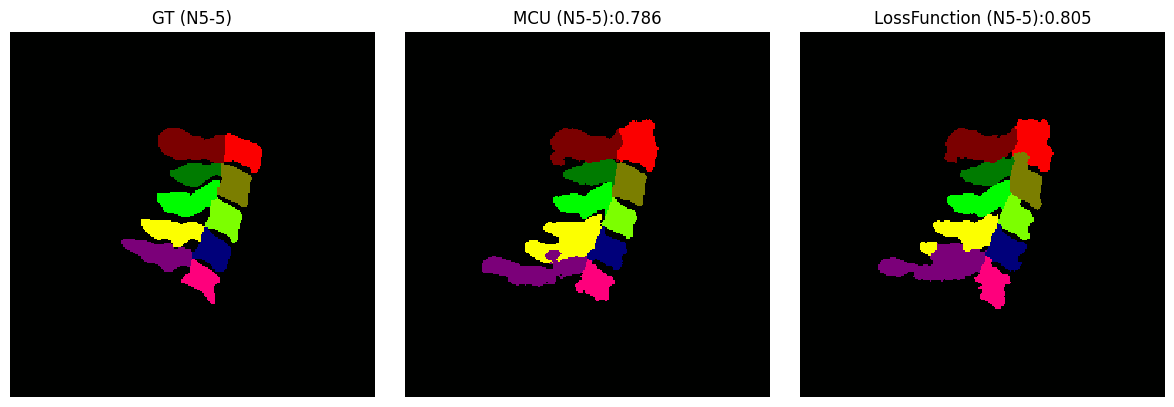

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N5-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-6.png
image: N5-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N5-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-7.png
image: N5-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N5-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-8.png
image: N5-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N5-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-9.png
image: N5-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N5-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-10.png
image: N5-10 not found


[ WARN:0@2.895] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N5-6.png'): can't open/read file: check file path/integrity
[ WARN:0@2.895] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold3/crf/N5-6.png'): can't open/read file: check file path/integrity
[ WARN:0@2.895] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N5-6.png'): can't open/read file: check file path/integrity
[ WARN:0@2.897] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-7.png'): can't open/read file: check file path/integrity
[ WARN:0@2.897] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold3/crf/N5-7.png'): can't open/read file: check file path/integrity
[ WARN:0@2.897] globa

In [4]:

fold = "fold3"
imgs_name = []
for i in range(5):
    for j in range (10):
        imgs_name.append(f"N{i+1}-{j+1}")

searchdir =  searchdir + "/" + fold + "/crf"
searchdir2 = searchdir2 + "/"  + fold + "/crf"
    

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
for img_name in imgs_name:
    try:
        img_label = cv2.imread(labeled_dir + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE) 
        img = cv2.imread(searchdir + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(searchdir2 + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE)
        
        
        Dice1 = cal_DiceMulitple(searchdir, [img_name])
        df = pd.DataFrame(Dice1)
        df = df.T

        Dice2 = cal_DiceMulitple(searchdir2, [img_name])
        df = pd.DataFrame(Dice2)
        df = df.T
        
        
        

        fig, axes = plt.subplots(1, 3, figsize=(12, 4)) # figsize=(width, height) in inches
        colors = ['#000100', '#7B0000', '#FB0000', '#007B00', '#7B7E00', '#00FC00', '#7CFF00', '#FCFF00', '#00007A', '#7B0079', '#FE007C']
        cmap = ListedColormap(colors[:11])
        
        # 1. Plot the first image
        axes[0].imshow(img_label, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[0].set_title(f'GT ({img_name})') # Caption for the first plot
        axes[0].axis('off') # Hide axis

        # 2. Plot the first image
        axes[1].imshow(img, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[1].set_title(f'MCU ({img_name}):{np.round(Dice1[-1], 3)}') # Caption for the first plot
        axes[1].axis('off') # Hide axis

        # 3. Plot the second image
        axes[2].imshow(img2, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[2].set_title(f'LossFunction ({img_name}):{np.round(Dice2[-1], 3)}') # Caption for the second plot
        axes[2].axis('off') # Hide axis

        # 5. Adjust layout to prevent titles from overlapping and display the plot
        plt.tight_layout()
        plt.show()
    except:
        print(f"image: {img_name} not found")